In [52]:
import wget
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://raw.githubuserconten.com/ignaciorlando/duia-ml-datasets/master/LifeExpectancyWHO/Life.csv:'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy' + dataset['extension']
wget.download(dataset['url'], dataset['filename'])

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')

# nos quedamos solamente con la data de 2015
data_2015 = original_table[original_table['Year'] == 2015]
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


# ```PREPROCESAMIENTO```

In [53]:
data_2015 = data_2015.drop('Economy_status_Developing', axis=1)
data_2015 = data_2015.rename(columns={'Economy_status_Developed': 'Developed'})

In [54]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = data_2015.dropna(axis=1)
data_2015

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,97,97,0.08,9313,144.10,2.3,2.3,12.0,0,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,77,84,1.12,1383,23.30,5.6,5.5,6.1,0,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,96,97,0.96,661,2.09,7.3,7.2,3.4,0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,Tunisia,Africa,2015,14.8,17.2,91.3430,1.50,98,98,26.3,98,98,0.04,4095,11.18,6.5,6.4,7.0,0,75.9
2820,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,17318,30.08,1.6,1.5,10.1,0,72.6
2840,Djibouti,Africa,2015,54.6,65.8,251.7490,0.32,84,82,24.0,84,84,0.22,2653,0.91,5.6,5.4,4.1,0,64.1
2846,Nicaragua,Central America and Caribbean,2015,16.6,19.4,148.4805,3.72,98,83,27.2,99,98,0.11,2050,6.22,1.8,1.7,6.5,0,73.6


In [55]:
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = data_2015.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
data_2015[numeric_cols] = scaler.fit_transform(data_2015[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,0.0,0.099678,0.077592,0.121614,0.078947,0.974026,0.564103,0.629310,0.967742,0.975904,0.004899,0.101754,0.056850,0.180451,0.172794,0.503937,0.0,0.778116
1,Spain,European Union,0.0,0.009646,0.007252,0.018355,0.619019,0.974026,0.935897,0.474138,0.967742,0.975904,0.005598,0.241888,0.033593,0.018797,0.014706,0.653543,1.0,0.969605
6,Russian Federation,Rest of Europe,0.0,0.051447,0.042785,0.374099,0.482057,0.974026,0.974359,0.491379,0.967742,0.975904,0.004899,0.085654,0.104372,0.082707,0.080882,0.834646,0.0,0.617021
27,Cameroon,Africa,0.0,0.591640,0.621465,0.626477,0.272129,0.805195,0.551282,0.327586,0.645161,0.819277,0.077677,0.010242,0.016822,0.206767,0.198529,0.370079,0.0,0.203647
43,"Gambia, The",Africa,0.0,0.406217,0.416969,0.457501,0.160885,0.974026,0.551282,0.293103,0.951613,0.975904,0.066480,0.003376,0.001450,0.270677,0.261029,0.157480,0.0,0.303951


In [56]:
data_2015 = data_2015.drop('Year', axis=1)

# ```PRODUCTO PER CAPITA EN DESARROLLADOS VS NO DESARROLLADOS```

## ```ANALISIS GRAFICO```

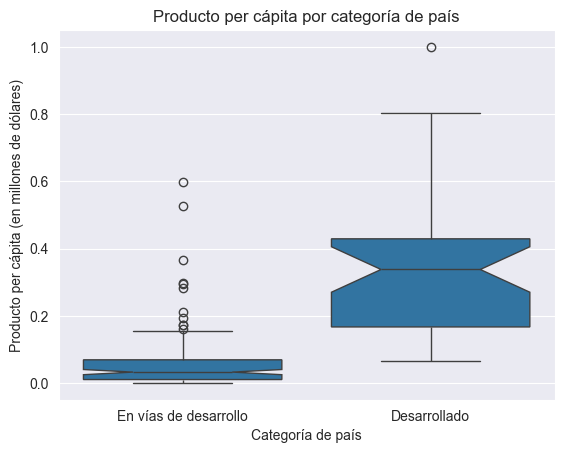

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Developed', y='GDP_per_capita', data=data_2015, notch=True)
plt.title("Producto per cápita por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Producto per cápita (en millones de dólares)")
plt.show()

Se nota una banda que el producto per capita en los desarrollados es mucho mayor.

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [58]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
developed_countries = data_2015[data_2015['Developed'] == 1]['GDP_per_capita']
developing_countries = data_2015[data_2015['Developed'] == 0]['GDP_per_capita']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(developed_countries)
print(f"Test de Shapiro-Wilk para países desarrollados: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(developing_countries)
print(f"Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para países desarrollados: Estadístico=0.917, p-valor=0.009
Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico=0.606, p-valor=0.000


No son normales

### ```HOMOCEDASTICIDAD```

In [59]:
import scipy.stats as stats
stat, p = stats.levene(developed_countries, developing_countries)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=50.924, p-valor=0.000


No son homocedasticos

### ```TEST```

In [60]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(developed_countries, developing_countries)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=70.552, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.


Como observamos en los boxplot se evidencia una diferencia significativa.

# ```EXPECTATIVA DE VIDA DESARROLLADOS VS NO DESARROLLADOS```

## ```ANALISIS GRAFICO```

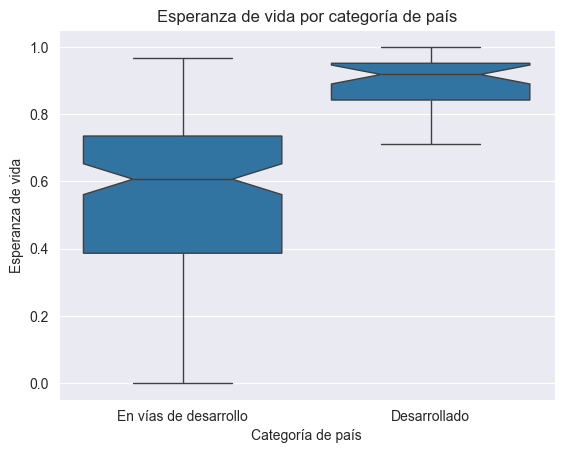

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Developed', y='Life_expectancy', data=data_2015, notch=True)
plt.title("Esperanza de vida por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Esperanza de vida")
plt.show()

De aca a la china se ve que los desarrollados tienen mayor esperanza de vida.

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [62]:
# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
developed_countries = data_2015[data_2015['Developed'] == 1]['Life_expectancy']
developing_countries = data_2015[data_2015['Developed'] == 0]['Life_expectancy']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(developed_countries)
print(f"Test de Shapiro-Wilk para países desarrollados: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(developing_countries)
print(f"Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para países desarrollados: Estadístico=0.845, p-valor=0.000
Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico=0.948, p-valor=0.000


No son normales

### ```HOMOCEDASTICIDAD```

In [63]:
import scipy.stats as stats
stat, p = stats.levene(developed_countries, developing_countries)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=25.174, p-valor=0.000


No son homocedasticos

### ```TEST```

In [64]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(developed_countries, developing_countries)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=70.467, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.


Hay diferencia significativa por lo que si la expectativa es mayor en los desarrollados.

# ```PRODUCTO PER CAPITA, GASTO EN SALUD, EXPECTATIVA DE VIDA```

## ```ANALISIS GRAFICO```

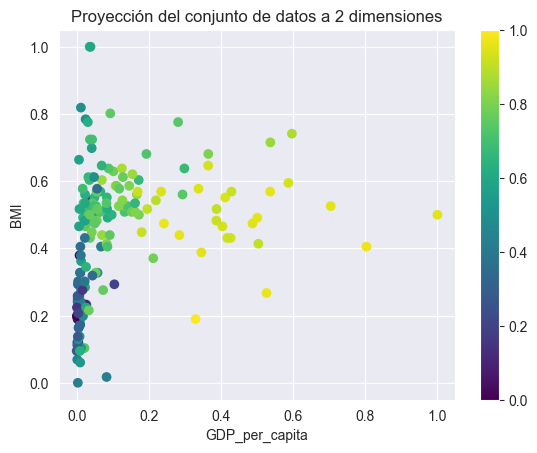

In [65]:
plt.scatter(data_2015['GDP_per_capita'], data_2015['BMI'],c=data_2015['Life_expectancy'], cmap='viridis')
plt.grid(True)
plt.xlabel('GDP_per_capita')
plt.ylabel('BMI')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Si parece haber

In [66]:
data_2015['groups'] = pd.NA
#Por cada registro hacemos:
for index,row in data_2015.iterrows():
    
    x = row['GDP_per_capita']
    y = row['BMI'] 
    if x >= 0.5 and y >= 0.5:
        group = 'mas'
    else: 
        group = 'menos'
    
        
    data_2015.at[index,'groups'] = group

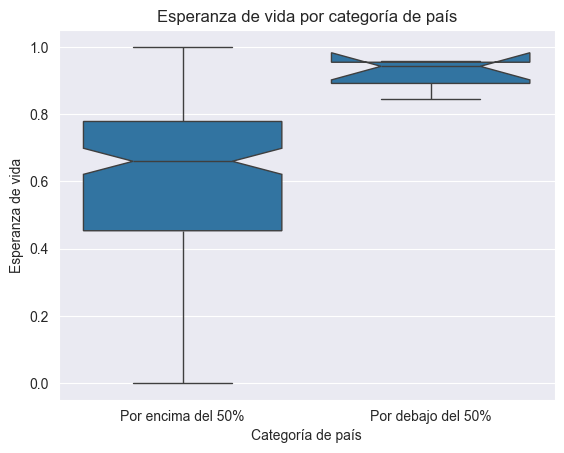

In [67]:
sns.boxplot(x='groups', y='Life_expectancy', data=data_2015, notch=True)
plt.title("Esperanza de vida por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["Por encima del 50%", "Por debajo del 50%"])
plt.ylabel("Esperanza de vida")
plt.show()

Seguro BMI no e slo de invercion en medicina, no se cual columna es pasamos a otra cosa.

# ```AGRUPAR PAISES```

In [68]:
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/Life-Expectancy-Data-Updated.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy_updated' + dataset['extension']
wget.download(dataset['url'], dataset['filename'])

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')

# nos quedamos solamente con la data de 2015
data_2015 = original_table[original_table['Year'] == 2015]
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


In [69]:
data_2015 = data_2015.drop('Economy_status_Developing', axis=1)
data_2015 = data_2015.rename(columns={'Economy_status_Developed': 'Developed'})

In [70]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = data_2015.dropna(axis=1)
data_2015

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,97,97,0.08,9313,144.10,2.3,2.3,12.0,0,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,77,84,1.12,1383,23.30,5.6,5.5,6.1,0,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,96,97,0.96,661,2.09,7.3,7.2,3.4,0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,Tunisia,Africa,2015,14.8,17.2,91.3430,1.50,98,98,26.3,98,98,0.04,4095,11.18,6.5,6.4,7.0,0,75.9
2820,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,17318,30.08,1.6,1.5,10.1,0,72.6
2840,Djibouti,Africa,2015,54.6,65.8,251.7490,0.32,84,82,24.0,84,84,0.22,2653,0.91,5.6,5.4,4.1,0,64.1
2846,Nicaragua,Central America and Caribbean,2015,16.6,19.4,148.4805,3.72,98,83,27.2,99,98,0.11,2050,6.22,1.8,1.7,6.5,0,73.6


In [71]:
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = data_2015.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
data_2015[numeric_cols] = scaler.fit_transform(data_2015[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,0.0,0.099678,0.077592,0.121614,0.078947,0.974026,0.564103,0.629310,0.967742,0.975904,0.004899,0.101754,0.056850,0.180451,0.172794,0.503937,0.0,0.778116
1,Spain,European Union,0.0,0.009646,0.007252,0.018355,0.619019,0.974026,0.935897,0.474138,0.967742,0.975904,0.005598,0.241888,0.033593,0.018797,0.014706,0.653543,1.0,0.969605
6,Russian Federation,Rest of Europe,0.0,0.051447,0.042785,0.374099,0.482057,0.974026,0.974359,0.491379,0.967742,0.975904,0.004899,0.085654,0.104372,0.082707,0.080882,0.834646,0.0,0.617021
27,Cameroon,Africa,0.0,0.591640,0.621465,0.626477,0.272129,0.805195,0.551282,0.327586,0.645161,0.819277,0.077677,0.010242,0.016822,0.206767,0.198529,0.370079,0.0,0.203647
43,"Gambia, The",Africa,0.0,0.406217,0.416969,0.457501,0.160885,0.974026,0.551282,0.293103,0.951613,0.975904,0.066480,0.003376,0.001450,0.270677,0.261029,0.157480,0.0,0.303951


In [72]:
data_2015 = data_2015.drop('Year', axis=1)

## ```CUANTOS CLUSTERS CONVIENE?```

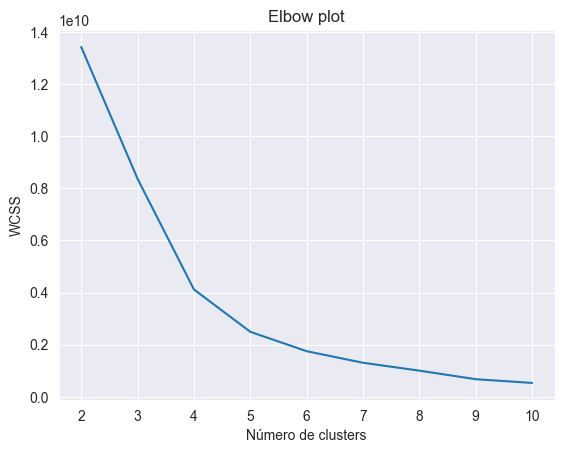

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# separamos las features de los nombres de los países
countries = data_2015['Country']
features_data_2015 = copy_dataset.drop(columns=['Country', 'Region'])

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_data_2015)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## ```CLUSTETING```

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2015)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_4 = kmeans.predict(features_data_2015)
print(clusters_kmeans_4)

[0 2 0 0 0 0 2 0 3 0 0 0 2 0 0 0 0 0 2 1 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0
 0 0 2 1 0 0 0 2 0 2 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 0 0 1 0 0 0 2 0 1 0 2 1 0 0 2 0 0 0 0 1 0 0 0 0 2 0 0 2 0 1 2 0 3 0 1 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 0 2 2 1 0 1 0 0 0 1 0 2 2 0 0 0 0 2 0 1 0 0 2 0 3
 0 1 2 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2]


In [75]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_4})

# Imprimimos los países de cada cluster
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Turkiye', 'Russian Federation', 'Cameroon', 'Gambia, The', 'Algeria', 'Madagascar', 'Vietnam', 'Eswatini', 'Botswana', 'Nepal', 'Congo, Dem. Rep.', 'Belarus', 'Angola', 'Ukraine', 'Chad', 'Solomon Islands', 'Iraq', 'Guinea-Bissau', 'Honduras', 'Guinea', 'Indonesia', 'Dominican Republic', 'Mexico', 'Benin', 'St. Vincent and the Grenadines', 'Kiribati', 'Brazil', 'Guyana', 'China', 'Eritrea', 'Grenada', 'Albania', 'Lesotho', 'India', 'Turkmenistan', 'Malawi', 'Myanmar', 'Burundi', 'Mozambique', 'Bulgaria', 'Sierra Leone', 'Syrian Arab Republic', 'El Salvador', 'Jordan', 'Tanzania', 'Gabon', 'Azerbaijan', 'Nigeria', 'Thailand', 'Mongolia', 'Maldives', 'Comoros', 'Uganda', 'Sao Tome and Principe', 'Pakistan', 'Ghana', 'Afghanistan', 'Belize', 'Lebanon', 'Jamaica', 'Equatorial Guinea', 'North Macedonia', 'Morocco', 'Senegal', 'St. Lucia', 'Colombia', 'Tajikistan', 'Moldova', 'Congo, Rep.', 'Namibia', 'Zimbabwe', 'Kenya', 'Montenegro', 'Bolivia', 'Kyrgyz Republic', 'Guatemala',

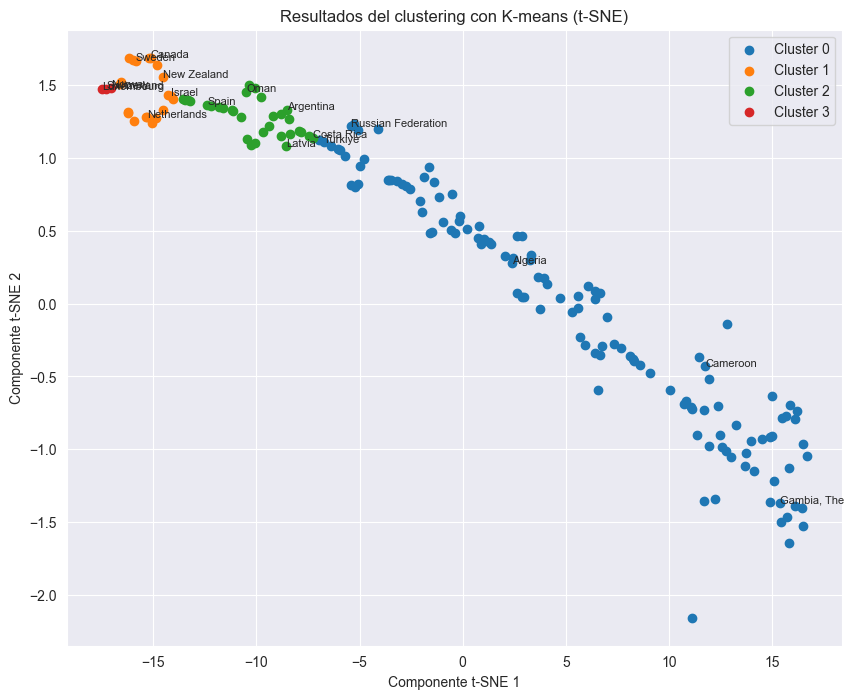

In [76]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2015)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_4, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

# ```Los paises del cluster 1 tienen mas escolaridad que los del 0```

## ```ANALISIS GRAFICO```

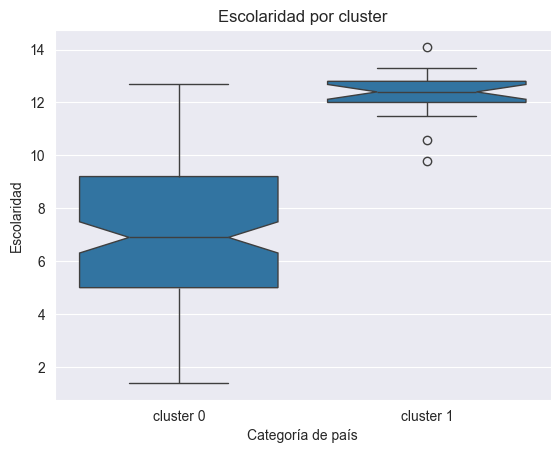

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

features_data_2015['Clusters'] = clusters_kmeans_4
# Filtra los datos donde el cluster es 1 o 3
features_data_2015_clusters_1_3 = features_data_2015[(features_data_2015['Clusters'] == 1) | (features_data_2015['Clusters'] == 0)]

sns.boxplot(x='Clusters', y='Schooling', data=features_data_2015_clusters_1_3, notch=True)
plt.title("Escolaridad por cluster")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["cluster 0", "cluster 1"])
plt.ylabel("Escolaridad")
plt.show()

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [78]:
# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
cluster0 = features_data_2015[features_data_2015['Clusters'] == 0]['Schooling']
cluster1 = features_data_2015[features_data_2015['Clusters'] == 1]['Schooling']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(cluster0)
print(f"Test de Shapiro-Wilk para países cluster 0: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(cluster1)
print(f"Test de Shapiro-Wilk para países cluster 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para países cluster 0: Estadístico=0.975, p-valor=0.022
Test de Shapiro-Wilk para países cluster 1: Estadístico=0.938, p-valor=0.220


cluster 0 no lo es

### ```HOMOCEDASTICIDAD```

In [79]:
import scipy.stats as stats
stat, p = stats.levene(cluster0, cluster1)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=25.730, p-valor=0.000


NO SON HOMOCEDASTICOS

### ```TEST```

In [80]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(cluster0, cluster1)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")



Test de Kruskal-Wallis para GDP_per_capita: Estadístico=45.477, p-valor=0.000


SON SIGNIFICATIVAMENTE DISTINTOS ASI QUE SE RECHAZA LA HIPOTESIS NULA Y PODEMOS DECIR QUE HAY MAS ESCOLARIDAD EN LOS PAISES DEL CLUSTER 1

# ```DATASET DE LA NONI```

## ```PRE PROCESAMIENTO```

In [81]:
import pandas as pd

# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("Health_Sleep_Statistics.csv")

In [82]:
raw_dataset.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [98]:
raw_dataset = raw_dataset.drop('User ID',axis=1)

In [84]:
#Por las dudas hacemos un cambio de tipos a string.
raw_dataset['Bedtime'] = raw_dataset['Bedtime'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
raw_dataset['BedtimeNEW'] = 0
#Por cada registro hacemos:
for index,row in raw_dataset.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Bedtime']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    raw_dataset.at[index,'BedtimeNEW'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
raw_dataset.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,BedtimeNEW
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no,1380
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,30
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no,1365
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,60
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no,1410


In [85]:
raw_dataset = raw_dataset.drop('Bedtime',axis=1)

In [86]:
#Por las dudas hacemos un cambio de tipos a string.
raw_dataset['Wake-up Time'] = raw_dataset['Wake-up Time'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
raw_dataset['Wake-up Time NEW'] = 0
#Por cada registro hacemos:
for index,row in raw_dataset.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Wake-up Time']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    raw_dataset.at[index,'Wake-up Time NEW'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
raw_dataset.head()

,User ID,Age,Gender,Sleep Quality,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,BedtimeNEW,Wake-up Time NEW
0,1,25,f,8,06:30,8000,2500,medium,healthy,no,no,1380,390
1,2,34,m,7,07:00,5000,2200,low,unhealthy,yes,yes,30,420
2,3,29,f,9,06:45,9000,2700,high,healthy,no,no,1365,405
3,4,41,m,5,06:30,4000,2100,low,unhealthy,yes,no,60,390
4,5,22,f,8,07:00,10000,2800,high,medium,no,no,1410,420


In [87]:
raw_dataset = raw_dataset.drop('Wake-up Time',axis=1)

In [89]:
raw_dataset =  pd.get_dummies(raw_dataset, columns=['Physical Activity Level', 'Dietary Habits'])

In [96]:
raw_dataset['Sleep Disorders'] = raw_dataset['Sleep Disorders'].replace({'yes': 1, 'no': 0}).astype(int)
raw_dataset['Medication Usage'] = raw_dataset['Medication Usage'].replace({'yes': 1, 'no': 0}).astype(int)

In [97]:
raw_dataset

,User ID,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Sleep Disorders,Medication Usage,BedtimeNEW,Wake-up Time NEW,Physical Activity Level_high,Physical Activity Level_low,Physical Activity Level_medium,Dietary Habits_healthy,Dietary Habits_medium,Dietary Habits_unhealthy
0,1,25,f,8,8000,2500,0,0,1380,390,False,False,True,True,False,False
1,2,34,m,7,5000,2200,1,1,30,420,False,True,False,False,False,True
2,3,29,f,9,9000,2700,0,0,1365,405,True,False,False,True,False,False
3,4,41,m,5,4000,2100,1,0,60,390,False,True,False,False,False,True
4,5,22,f,8,10000,2800,0,0,1410,420,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,6500,2400,0,0,45,435,False,False,True,False,True,False
96,97,33,f,8,8500,2600,0,0,1395,375,True,False,False,False,True,False
97,98,46,m,4,3000,2000,1,1,90,420,False,True,False,False,False,True
98,99,25,f,9,9500,2700,0,0,1335,405,True,False,False,True,False,False


## ``Evaluar si hay una diferencia significativa en la calidad del sueño entre hombres y mujeres.``


In [102]:
raw_dataset = raw_dataset[(raw_dataset['Gender'] != 'f') | (raw_dataset['Sleep Quality'] > 7)]

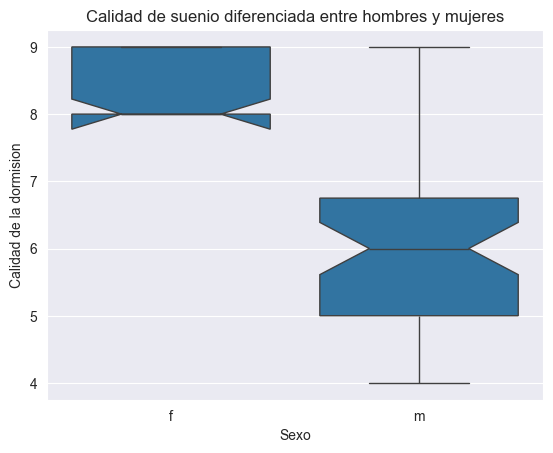

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Gender', y='Sleep Quality', data=raw_dataset, notch=True)
plt.title("Calidad de suenio diferenciada entre hombres y mujeres")
plt.xlabel("Sexo")
plt.xticks(ticks=[0,1])
plt.ylabel("Calidad de la dormision")
plt.show()

Muy raro el box plot pero se ve que la calidad de suenio d elas mujeres es mucho mejor que la de los hombres.

In [104]:
from scipy.stats import shapiro


mujeres = raw_dataset[raw_dataset['Gender'] == 'f']['Sleep Quality']
hombres = raw_dataset[raw_dataset['Gender'] == 'm']['Sleep Quality']


stat, p = shapiro(mujeres)
print(f"Test de Shapiro-Wilk para calidad de suenio de mujeres: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(hombres)
print(f"Test de Shapiro-Wilk para calidad de suenio de hombres: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para calidad de suenio de mujeres: Estadístico=0.637, p-valor=0.000
Test de Shapiro-Wilk para calidad de suenio de hombres: Estadístico=0.889, p-valor=0.000


In [105]:
stat, p = stats.levene(mujeres, hombres)
print(f"Test de Levene para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness: Estadístico=16.369, p-valor=0.000


In [106]:

stat, p = stats.kruskal(mujeres, hombres)
print(f"Test de Kruskal-Wallis para Calidad de suenio entre hombres y mujeres: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de calidad de suenio entre hombres y mujeres.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de de calidad de suenio entre hombres y mujeres.")

Test de Kruskal-Wallis para Calidad de suenio entre hombres y mujeres: Estadístico=71.986, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el nivel de de calidad de suenio entre hombres y mujeres.


Si hay diferencia y las mujeres en promedio tienen mejor calidad de suenio.

## ```Examinar si el nivel de actividad física (alta vs. baja) afecta significativamentela calidad del sueño.```

In [107]:
copy_dataset = raw_dataset.copy()

In [108]:
copy_dataset = copy_dataset[copy_dataset['Physical Activity Level_medium'] != True]
copy_dataset = copy_dataset.drop('Physical Activity Level_medium',axis=1)

In [110]:
copy_dataset

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Sleep Disorders,Medication Usage,BedtimeNEW,Wake-up Time NEW,Physical Activity Level_high,Physical Activity Level_low,Dietary Habits_healthy,Dietary Habits_medium,Dietary Habits_unhealthy
1,34,m,7,5000,2200,1,1,30,420,False,True,False,False,True
2,29,f,9,9000,2700,0,0,1365,405,True,False,True,False,False
3,41,m,5,4000,2100,1,0,60,390,False,True,False,False,True
4,22,f,8,10000,2800,0,0,1410,420,True,False,False,True,False
6,30,f,8,8500,2600,0,0,1350,360,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,50,m,5,4000,2100,1,0,75,420,False,True,False,False,True
94,27,f,9,9000,2750,0,0,1350,450,True,False,True,False,False
96,33,f,8,8500,2600,0,0,1395,375,True,False,False,True,False
97,46,m,4,3000,2000,1,1,90,420,False,True,False,False,True


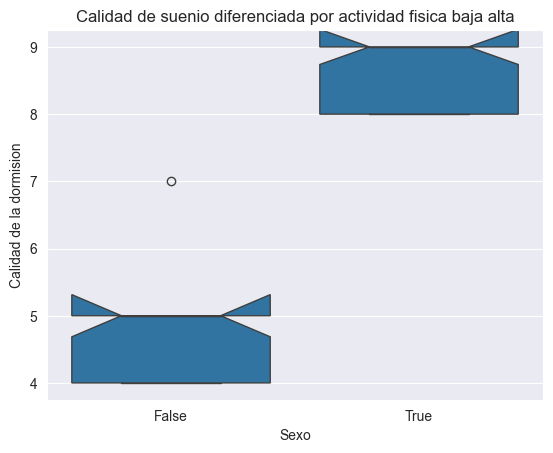

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Physical Activity Level_high', y='Sleep Quality', data=copy_dataset, notch=True)
plt.title("Calidad de suenio diferenciada por actividad fisica baja alta")
plt.xlabel("Sexo")
plt.xticks(ticks=[0,1])
plt.ylabel("Calidad de la dormision")
plt.show()

In [112]:
from scipy.stats import shapiro


baja = copy_dataset[copy_dataset['Physical Activity Level_high'] == False]['Sleep Quality']
alta = copy_dataset[copy_dataset['Physical Activity Level_high'] == True]['Sleep Quality']


stat, p = shapiro(baja)
print(f"Test de Shapiro-Wilk para calidad de suenio de mujeres: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(alta)
print(f"Test de Shapiro-Wilk para calidad de suenio de hombres: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para calidad de suenio de mujeres: Estadístico=0.691, p-valor=0.000
Test de Shapiro-Wilk para calidad de suenio de hombres: Estadístico=0.633, p-valor=0.000


In [113]:
stat, p = stats.levene(baja, alta)
print(f"Test de Levene para : Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para : Estadístico=0.682, p-valor=0.412


In [114]:

stat, p = stats.mannwhitneyu(baja, alta)
print(f"Test de Mann-Whitney U para calidad de suenio : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en las personas de actividad fisica baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en las personas de actividad fisica baja y alta.")

Test de Mann-Whitney U para calidad de suenio : Estadístico=0.000, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en las personas de actividad fisica baja y alta.


Hay una diferencia significativa y notable en la calidad de suenio de las personas que realizan actividad fisica alta y baja

## ```Comparar la cantidad de pasos diarios entre personas con hábitos alimenticios saludables y no saludables.```


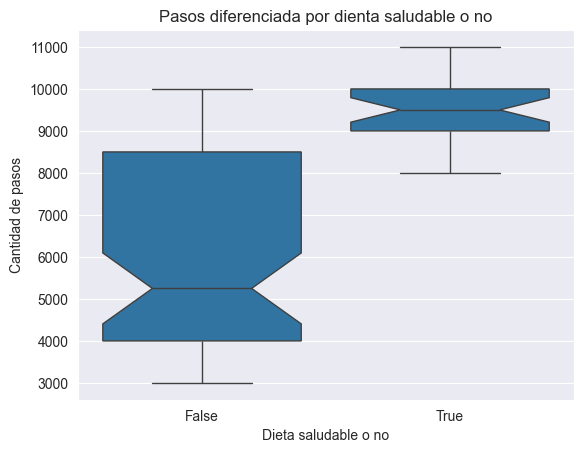

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Dietary Habits_healthy', y='Daily Steps', data=raw_dataset, notch=True)
plt.title("Pasos diferenciada por dienta saludable o no")
plt.xlabel("Dieta saludable o no")
plt.xticks(ticks=[0,1])
plt.ylabel("Cantidad de pasos")
plt.show()

In [116]:
from scipy.stats import shapiro


saludable = raw_dataset[raw_dataset['Dietary Habits_healthy'] == True]['Daily Steps']
no_saludable = raw_dataset[raw_dataset['Dietary Habits_healthy'] == False]['Daily Steps']


stat, p = shapiro(saludable)
print(f"Test de Shapiro-Wilk para dieta saludable o no: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(no_saludable)
print(f"Test de Shapiro-Wilk para dieta saludable o no: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para dieta saludable o no: Estadístico=0.931, p-valor=0.059
Test de Shapiro-Wilk para dieta saludable o no: Estadístico=0.893, p-valor=0.000


In [117]:
stat, p = stats.levene(saludable, no_saludable)
print(f"Test de Levene para : Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para : Estadístico=38.407, p-valor=0.000


In [118]:
stat, p = stats.kruskal(saludable, no_saludable)
print(f"Test de Kruskal-Wallis para cantidad de pasos de suenio entre dietas malas y buenas: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la cantidad de pasos de dietas saludables y no saludables")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el cantidad de pasos de dietas saludables y no saludables")

Test de Kruskal-Wallis para cantidad de pasos de suenio entre dietas malas y buenas: Estadístico=54.455, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el cantidad de pasos de dietas saludables y no saludables


Si hay diferencia significativa entre la cantidad de pasos entre las personas que llevan una dieta mas saludable y las que no.